# import libraries

In [2]:
 ! pip install -q kaggle


In [3]:
 from google.colab import files


In [4]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"belalmohamed271","key":"49d7c7e93fdfb3359a4562d25d96f540"}'}

In [5]:
! mkdir ~/.kaggle


In [6]:
! cp kaggle.json ~/.kaggle/


In [7]:
! chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 344M/346M [00:17<00:00, 23.0MB/s]
100% 346M/346M [00:17<00:00, 20.7MB/s]


In [10]:
! unzip /content/intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [11]:
import tensorflow as tf
import os 
import cv2
import imghdr
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib import image as mpimg 
import pandas as np
import keras

# load data

In [12]:
train_data = "seg_train"
test_data = "seg_test"
pre_data = "seg_pred"

In [13]:
train_data = tf.keras.utils.image_dataset_from_directory('seg_train',image_size=(244, 244))
test_data = tf.keras.utils.image_dataset_from_directory('seg_test',image_size=(244, 244))


Found 14034 files belonging to 1 classes.
Found 3000 files belonging to 1 classes.


In [ ]:
#tf.keras.utils.image_dataset_from_directory??

In [14]:
test_data = test_data.map(lambda x,y: (x/255, y))
train_data = train_data.map(lambda x,y: (x/255, y))

In [15]:
train_data_iterator = train_data.as_numpy_iterator()
test_data_iterator= test_data.as_numpy_iterator()

In [16]:
train_data_batch = train_data_iterator.next()
test_data_batch = test_data_iterator.next()

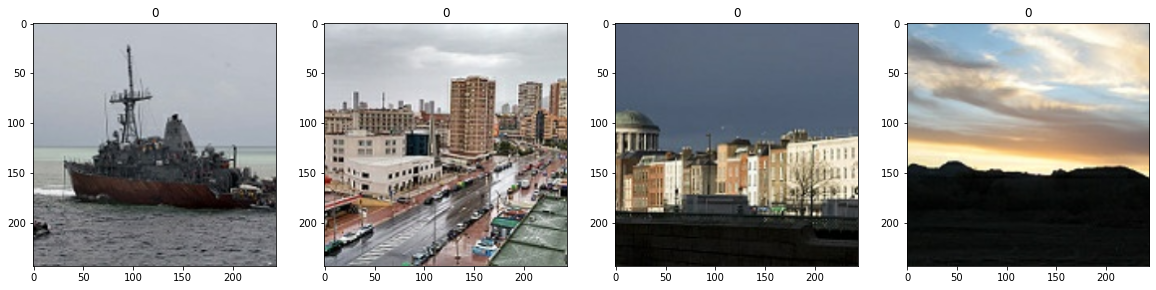

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_data_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(train_data_batch[1][idx])


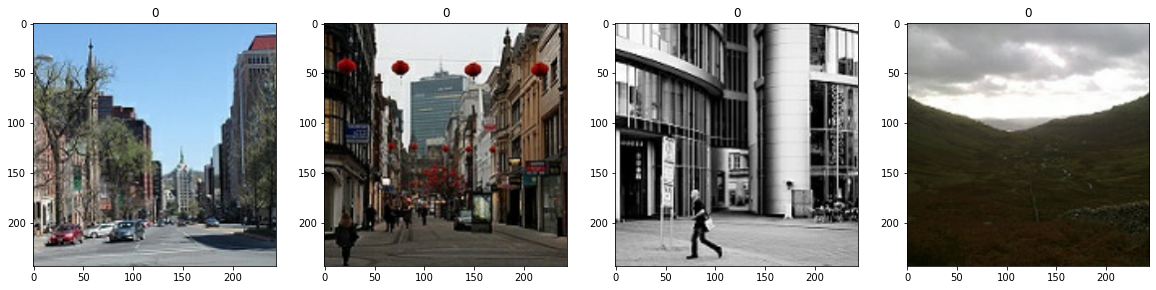

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(test_data_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(test_data_batch[1][idx])


In [19]:
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# mobilenet model

In [20]:
url = 'https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/5'
base_model = hub.KerasLayer(url, input_shape=(244,244,3))

In [21]:
model =keras.Sequential([
    base_model,
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(6),
])

In [22]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
model_1 = model.fit(train_data, epochs=5, validation_data=test_data, callbacks=[tensorboard_callback])

Epoch 1/5
439/439 [==============================] - 35s 60ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 3.1789e-09 - val_accuracy: 1.0000
Epoch 2/5
439/439 [==============================] - 27s 61ms/step - loss: 5.0796e-09 - accuracy: 1.0000 - val_loss: 3.1789e-09 - val_accuracy: 1.0000
Epoch 3/5
439/439 [==============================] - 26s 58ms/step - loss: 5.0541e-09 - accuracy: 1.0000 - val_loss: 3.1789e-09 - val_accuracy: 1.0000
Epoch 4/5
439/439 [==============================] - 27s 61ms/step - loss: 5.0032e-09 - accuracy: 1.0000 - val_loss: 3.1789e-09 - val_accuracy: 1.0000
Epoch 5/5
439/439 [==============================] - 27s 60ms/step - loss: 4.9607e-09 - accuracy: 1.0000 - val_loss: 3.1789e-09 - val_accuracy: 1.0000


# VGG16 model

In [27]:
from keras.applications.vgg16 import VGG16

In [28]:
model_2=VGG16(weights='imagenet')

553467096/553467096 [==============================] - 27s 0us/step


In [29]:
print(model_2.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### this model use input (224,224,3) so we need to preprocess the data for that model 

In [30]:
train_data_2 = tf.keras.utils.image_dataset_from_directory('seg_train',image_size=(224, 224))
test_data_2 = tf.keras.utils.image_dataset_from_directory('seg_test',image_size=(224, 224))

Found 14034 files belonging to 1 classes.
Found 3000 files belonging to 1 classes.


In [31]:
test_data_2 = test_data_2.map(lambda x,y: (x/255, y))
train_data_2 = train_data_2.map(lambda x,y: (x/255, y))

In [32]:
train_data_iterator_2 = train_data_2.as_numpy_iterator()
test_data_iterator_2= test_data_2.as_numpy_iterator()

In [33]:
train_data_batch_2 = train_data_iterator_2.next()
test_data_batch_2 = test_data_iterator_2.next()

In [34]:
base_input = model_2.layers[0].input
base_output = model_2.layers[-2].output
final_output = layers.Dense(6)(base_output)
model_2 = keras.Model(inputs=base_input,outputs=final_output)

In [35]:
model_2.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
model_2 = model_2.fit(train_data_2, epochs=5, validation_data=test_data_2, callbacks=[tensorboard_callback])

Epoch 1/5
439/439 [==============================] - 221s 485ms/step - loss: 0.0035 - accuracy: 0.9981 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
439/439 [==============================] - 211s 480ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
439/439 [==============================] - 213s 485ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
439/439 [==============================] - 206s 468ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
439/439 [==============================] - 205s 467ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


# ResNet50 model


In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [43]:
model_3=ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 5s 0us/step


In [44]:
print(model_3.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### this model use input (224,224,3) so we need to preprocess the data for that model 

In [45]:
train_data_3 = tf.keras.utils.image_dataset_from_directory('seg_train',image_size=(224, 224))
test_data_3 = tf.keras.utils.image_dataset_from_directory('seg_test',image_size=(224, 224))

Found 14034 files belonging to 1 classes.
Found 3000 files belonging to 1 classes.


In [46]:
test_data_3 = test_data_3.map(lambda x,y: (x/255, y))
train_data_3 = train_data_3.map(lambda x,y: (x/255, y))

In [47]:
train_data_iterator_3 = train_data_3.as_numpy_iterator()
test_data_iterator_3= test_data_3.as_numpy_iterator()

In [48]:
train_data_batch_3 = train_data_iterator_3.next()
test_data_batch_3 = test_data_iterator_3.next()

In [49]:
base_input = model_3.layers[0].input
base_output = model_3.layers[-2].output
final_output = layers.Dense(6)(base_output)
model_3 = keras.Model(inputs=base_input,outputs=final_output)

In [50]:
model_3.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [51]:
logdir='logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
model_3 = model_3.fit(train_data_3, epochs=5, validation_data=test_data_3, callbacks=[tensorboard_callback])

Epoch 1/5
439/439 [==============================] - 160s 347ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 3.9736e-11 - val_accuracy: 1.0000
Epoch 2/5
439/439 [==============================] - 155s 352ms/step - loss: 3.3249e-07 - accuracy: 1.0000 - val_loss: 6.0717e-08 - val_accuracy: 1.0000
Epoch 3/5
439/439 [==============================] - 155s 352ms/step - loss: 1.5581e-07 - accuracy: 1.0000 - val_loss: 1.2294e-07 - val_accuracy: 1.0000
Epoch 4/5
439/439 [==============================] - 155s 352ms/step - loss: 8.9666e-08 - accuracy: 1.0000 - val_loss: 6.8585e-08 - val_accuracy: 1.0000
Epoch 5/5
439/439 [==============================] - 153s 347ms/step - loss: 5.0762e-08 - accuracy: 1.0000 - val_loss: 4.5538e-08 - val_accuracy: 1.0000
